## 05 Model Evaluation

#### Import relevant libraries

In [1]:
import os
import numpy as np
import pandas as pd
from joblib import dump, load

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import mean_absolute_error, mean_squared_error from sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Load model_fit file

In [3]:
input_dir = os.path.join('..', 'data', 'processed')
plots_dir = os.path.join('..', 'data', 'figures')
lin_model = load(os.path.join(input_dir, 'lin_model_3.joblib'))
rf_model = load(os.path.join(input_dir, 'forest_model_1.joblib'))
nnet_model = load(os.path.join(input_dir, 'neural_model_1.joblib'))

#### Load in test and train data

In [4]:
X_train = pd.read_csv(os.path.join(input_dir, 'X_train.csv'))
X_test = pd.read_csv(os.path.join(input_dir, 'X_test.csv'))
y_train = np.array(pd.read_csv(os.path.join(input_dir, 'y_train.csv'))['target'])
y_test = np.array(pd.read_csv(os.path.join(input_dir, 'y_test.csv'))['target'])

In [5]:
X_train = X_train.rename(columns={
    'c09_other_wires': 'c09',
    'c09_restructured': 'c09b',
    'c09_vert_int': 'c09c',
    
})
X_test = X_test.rename(columns={
    'c09_other_wires': 'c09',
    'c09_restructured': 'c09b',
    'c09_vert_int': 'c09c',
    
})

#### Predict on test set using trained models

In [6]:
y_pred_lin = lin_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_nnet = nnet_model.predict(X_test)

/home/julian/anaconda3/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- c09
- c09b
- c09c
Feature names seen at fit time, yet now missing:
- c09_other_wires
- c09_restructured
- c09_vert_int

  warnings.warn(message, FutureWarning)
/home/julian/anaconda3/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- c09
- c09b
- c09c
Feature names seen at fit time, yet now missing:
- c09_other_wires
- c09_restructured
- c09_vert_int

  warnings.warn(message, FutureWarning)
/home/julian/anaconda3/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature 

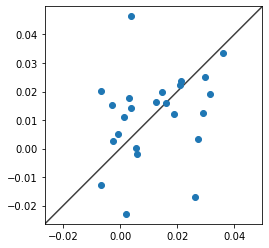

In [7]:
lin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lin})

fig, ax = plt.subplots()
ax.scatter(y_pred_lin, y_test)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

fig.savefig(os.path.join(plots_dir, 'actual_vs_pred_scatter.png'), dpi=300)

#### Compute fit statistics

(a) Bias := $\sum (\hat{y_i} - y_i) $

In [8]:
bias_lin = sum(y_pred_lin - y_test)
bias_rf = sum(y_pred_rf - y_test)

print("Bias of Linear Regression: {}".format(bias_lin))
print("Bias of Random Forest: {}".format(bias_rf))

Bias of Linear Regression: 0.008616496534022612
Bias of Random Forest: 0.09022174710548558


(b) Mean Absolute Error := $\frac{1}{n} \sum |\hat{y_i} - y_i|$

In [9]:
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("MAE of Linear Regression: {}".format(mae_lin))
print("MAE of Random Forest Model: {}".format(mae_rf))

MAE of Linear Regression: 0.012528023610104732
MAE of Random Forest Model: 0.009766764961744029


(c) Root Mean Square Error := $\sqrt{\frac{1}{n} \sum (\hat{y_i} - y_i)^2}$

In [10]:
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("RMSE of Linear Regression: {}".format(rmse_lin))
print("RMSE of Random Forest: {}".format(rmse_rf))

RMSE of Linear Regression: 0.0171803646022663
RMSE of Random Forest: 0.01337897230712203


(d) R squared := $1 - \frac{RSS}{TSS}$ := $1- \frac{\sum (\hat{y_i}-y_i)^2}{\sum (y_i - \mu)^2}$

In [11]:
r2_lin = r2_score(y_test, y_pred_lin)
r2_rf = r2_score(y_test, y_pred_rf)

print("R^2 of Linear Regression: {}".format(r2_lin))
print("R^2 of Random Forest: {}".format(r2_rf))

R^2 of Linear Regression: -0.27700613526232676
R^2 of Random Forest: 0.22558502753631327


[0.33819844 0.02471854 0.29471404 0.1622484  0.05630196 0.01280448
 0.02497056 0.0439977  0.02562598 0.00839059 0.0080293 ]


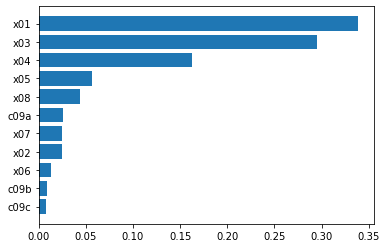

In [12]:
print(rf_model.feature_importances_)
variable_importance_df = pd.DataFrame({
    'variable': np.array(['x01', 'x02', 'x03', 'x04', 'x05', 'x06', 'x07', 'x08', 'c09a', 'c09b', 'c09c']),
    'values': rf_model.feature_importances_,
})
variable_importance_df = variable_importance_df.sort_values(by=['values'])
plt.barh(variable_importance_df['variable'], variable_importance_df['values'])
plt.savefig(os.path.join(plots_dir, 'rf_variable_importance_plot.png'), dpi=300)

#### Coefficient value estimates, p-values and std error for each feature variable

In [13]:
results = pd.DataFrame({
    'variables': X_train.columns,
    'coeff': lin_model.coef_,
})
results

,variables,coeff
0,x01,-0.016083
1,x02,-0.001614
2,x03,-0.001044
3,x04,-0.003028
4,x05,0.004486
5,x06,-0.000215
6,x07,-0.000204
7,x08,-0.004187
8,c09,-0.025540
9,c09b,-0.008865


Train fit analysis from OLS statsmodel package

In [14]:
import statsmodels.api as sm

In [15]:
X2_train = sm.add_constant(X_train)
ols_result = sm.OLS(y_train, X2_train).fit()
ols_result.summary()

/home/julian/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     3.848
Date:                Wed, 11 May 2022   Prob (F-statistic):           0.000183
Time:                        19:18:23   Log-Likelihood:                 235.44
No. Observations:                  92   AIC:                            -446.9
Df Residuals:                      80   BIC:                            -416.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.022      1.845      0.069      -0.003       0.086
x01           -0.0161      0.003     -4.604      0.000      -0.023      -0.009
x02           -0.0016      0.003     -0.474      0.637      -0.008       0.005
x03           -0.0010      0.003     -0.406      0.686      -0.006       0.004
x04           -0.0030      0.002     -1.352      0.180      -0.007       0.001
x05            0.0045      0.003      1.440      0.154      -0.002       0.011
x06           -0.0002      0.003     -0.075      0.940      -0.006       0.005
x07           -0.0002      0.003     -0.081      0.936      -0.005       0.005
x08           -0.0042      0.003     -1.352      0.180      -0.010       0.002
c09           -0.0255      0.023     -1.093      0.278      -0.072       0.021
c09b          -0.0089      0.024     -0.365      0.716      -0.057       0.039
c09c          -0.0342      0.023     -1.517      0.133      -0.079       0.011
==============================================================================
Omnibus:                       26.106   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.631
Skew:                           0.958   Prob(JB):                     5.60e-15
Kurtosis:                       6.668   Cond. No.                         35.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Partial dependence plots